# Time Series Analysis of Cryptocurrency Bitcoin

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_excel(r'/Users/radhikagarg/Desktop/TP TERM 3/TP/data/Cardano.xlsx',sheet_name='cardano_2020')
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %,MktCap,Tradecount
426,2021-03-02,1.224643,1.296248,1.298971,1.182334,1.100000e+09,-0.0552,39155277835,993914
427,2021-03-03,1.214324,1.224523,1.265522,1.209046,7.070200e+08,-0.0084,38868096418,529175
428,2021-03-04,1.112490,1.214405,1.229926,1.068434,1.100000e+09,-0.0839,35618147966,882082
429,2021-03-05,1.158227,1.112463,1.195702,1.037863,1.310000e+09,0.0411,37332335359,1132387
430,2021-03-06,1.129016,1.158277,1.181553,1.086688,7.570800e+08,-0.0252,36133913814,671557


In [4]:
print(df.info())
# 1161 rows depicting daily bitcoin prices from 2018 to 2021 with no issing data values in any feild

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        431 non-null    datetime64[ns]
 1   Price       431 non-null    float64       
 2   Open        431 non-null    float64       
 3   High        431 non-null    float64       
 4   Low         431 non-null    float64       
 5   Vol.        430 non-null    float64       
 6   Change %    431 non-null    float64       
 7   MktCap      431 non-null    int64         
 8   Tradecount  431 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 30.4 KB
None


Text(0.5, 1.0, 'Closing price Trend')

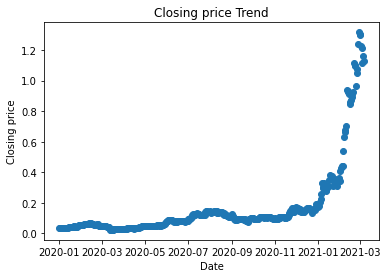

In [5]:
# PLOTTING Closing Prices against Dates.
plt.scatter(df.Date,df.Price)
plt.xlabel("Date")
plt.ylabel("Closing price")
plt.title("Closing price Trend")

In [6]:
import datetime
df['Date']=pd.to_datetime(df['Date']) # setting month as index to exclude month from describe calcs
df.head()
df.describe()

,Price,Open,High,Low,Vol.,Change %,MktCap,Tradecount
count,431.000000,431.000000,431.000000,431.000000,4.300000e+02,431.000000,4.310000e+02,4.310000e+02
mean,0.168904,0.166407,0.176843,0.156625,8.005223e+08,0.010433,5.048027e+09,1.807262e+05
std,0.243547,0.239237,0.257767,0.220752,5.530758e+08,0.066242,7.718098e+09,2.945443e+05
min,0.023222,0.023225,0.026454,0.017774,6.803000e+07,-0.414900,6.212325e+08,6.116000e+03
25%,0.051624,0.051503,0.054221,0.050664,4.422950e+08,-0.024950,1.347976e+09,4.681450e+04
50%,0.096851,0.096825,0.099746,0.092752,6.114900e+08,0.006600,2.906296e+09,7.513100e+04
75%,0.142738,0.141941,0.148062,0.137172,9.704625e+08,0.039000,3.809831e+09,1.610920e+05
max,1.316575,1.316618,1.484147,1.233117,3.070000e+09,0.332300,4.128961e+10,2.344043e+06


In [7]:
df.set_index('Date',inplace=True)

# Differencing

Time-Series Components
There are three components of time-series data:
Trend: the movement of the data on a larger scale (moving average)
Seasonality: repeated seasonal fluctuations
Residual: any fluctuations not captured from trend or seasonality (should be random)
A time series can be modeled as an additive or multiplicative time-series depending on its nature of trend and seasonality.
Additive Time Series
observed = Trend + Seasonal + Residual
Multiplicative Time Series
observed = Trend × Seasonal × Residual

Based on data values, if the magnitude of seasonality changes over time (see image on the right), then the data 
is multiplicative. Our data, however, does not show clear evidence of growing or shrinking magnitude of seasonality,
so we assume it is an additive time series. Please take a look at it once again.

we are using freq= 7*4*3 (~3 months) to model our data. You can tune it by holding into trend visualizations. If the trend's visualizations are smooth, and the seasonal has patterns, then it's good to continue. 
The extrapolate_trend='freq' will make the length of the residual, trend, and seasonal the same by taking care of any missing values at the beginning of the series. 

In [14]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    # Super not sure how to determin this... We'll have to do some research
    # 7 to 14 days seems reasonable to find overall trends
    rolmean = pd.Series(timeseries).rolling(window=14).mean()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in list(dftest[4].items()):
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

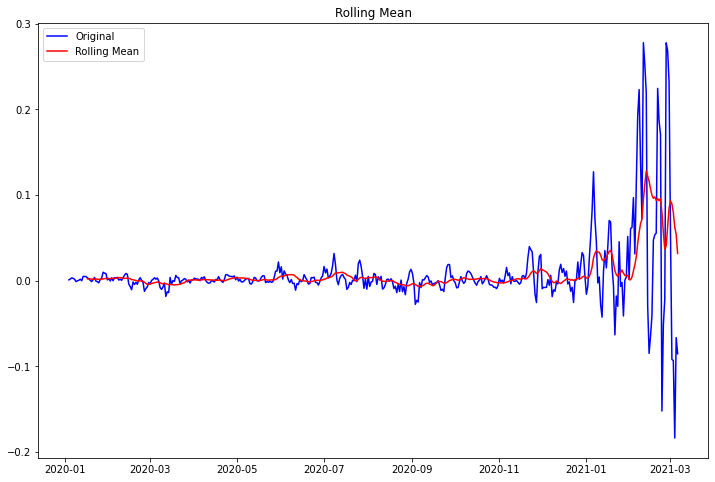

Results of Dickey-Fuller Test:
Test Statistic                  -2.118595
p-value                          0.237103
#Lags Used                      18.000000
Number of Observations Used    409.000000
Critical Value (1%)             -3.446440
Critical Value (5%)             -2.868633
Critical Value (10%)            -2.570548
dtype: float64


In [48]:
#prev 2 day dependency is seen
df['third_difference'] = df.Price - df.Price.shift(3)  
test_stationarity(df.third_difference.dropna(inplace=False))

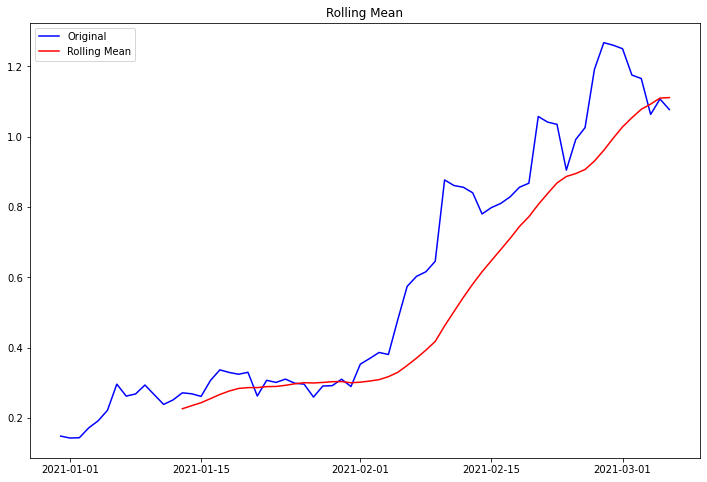

Results of Dickey-Fuller Test:
Test Statistic                 -0.420619
p-value                         0.906599
#Lags Used                      0.000000
Number of Observations Used    65.000000
Critical Value (1%)            -3.535217
Critical Value (5%)            -2.907154
Critical Value (10%)           -2.591103
dtype: float64


In [49]:
#prev 365 day dependency/annual is not seen
df['seasonal_difference'] = df.Price - df.Price.shift(365)  
test_stationarity(df.seasonal_difference.dropna(inplace=False))

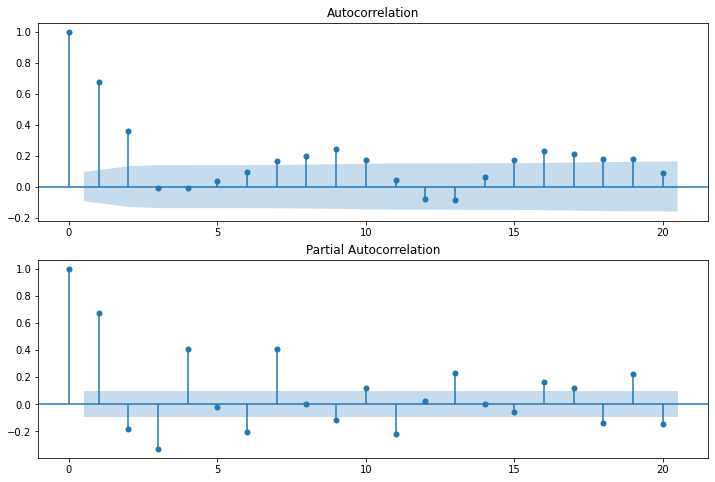

In [51]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.third_difference.iloc[3:], lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.third_difference.iloc[3:], lags=20, ax=ax2)
plt.show()

#p=2,
#d=3,
#q=3,

In [52]:
df.tail()

,Price,Open,High,Low,Vol.,Change %,MktCap,Tradecount,second_difference,seasonal_difference,third_difference
Date,,,,,,,,,,,
2021-03-02,1.224643,1.296248,1.298971,1.182334,1.100000e+09,-0.0552,39155277835,993914,-0.091932,1.175460,-0.091932
2021-03-03,1.214324,1.224523,1.265522,1.209046,7.070200e+08,-0.0084,38868096418,529175,-0.093349,1.165670,-0.093349
2021-03-04,1.112490,1.214405,1.229926,1.068434,1.100000e+09,-0.0839,35618147966,882082,-0.183710,1.063478,-0.183710
2021-03-05,1.158227,1.112463,1.195702,1.037863,1.310000e+09,0.0411,37332335359,1132387,-0.066416,1.107296,-0.066416
2021-03-06,1.129016,1.158277,1.181553,1.086688,7.570800e+08,-0.0252,36133913814,671557,-0.085308,1.077275,-0.085308


# AR Model

ARIMA models will require (p, d, q) arguments as its order, 
where: 
- p: The number of lag included in the model, or also called lag order. Previously defined by looking into PACF visualization
- d: Order of difference. In previous section, we know that doing a difference once made the data stationary. Thus, we will use d=1 on original data.
- q: The size of moving average windows, or also called moving average order. Previously defined by looking into ACF visualization

In [54]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Price'],order=(2,3,3))
model_fit=model.fit()

#Based on the model summary, all variables (ar and ma) have a p-value <5%. This means that our model 
#really fits into the train data. The AIC, BIC, and HQIC is a score to measure the goodness of our model based on 
#the train data.

ValueError: d > 2 is not supported

In [21]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Price   No. Observations:                  429
Model:                 ARIMA(3, 2, 2)   Log Likelihood                1020.735
Method:                       css-mle   S.D. of innovations              0.022
Date:                Sat, 10 Apr 2021   AIC                          -2027.470
Time:                        10:50:12   BIC                          -1999.040
Sample:                    01-03-2020   HQIC                         -2016.243
                         - 03-06-2021                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.499e-05   2.91e-05      1.202      0.229    -2.2e-05     9.2e-05
ar.L1.D2.Price     0.0502      0.195      0.258      0.797      -0.331       0.432
ar.L2.D2.Price     0.1190      0.048      2.466      0.014       0.024       0.214
ar.L3.D2.Price    -0.2439      0.055     -4.442      0.000      -0.351      -0.136
ma.L1.D2.Price    -0.9828      0.200     -4.915      0.000      -1.375      -0.591
ma.L2.D2.Price     0.0091      0.198      0.046      0.963      -0.378       0.396
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4920           -0.0000j            1.4920           -0.5000
AR.2            0.9901           -1.3298j            1.6579           -0.1481
AR.3            0.9901           +1.3298j            1.6579            0.1481
MA.1            1.0273           +0.0000j            1.0273            0.0000
MA.2          106.6451           +0.0000j          106.6451            0.0000
-----------------------------------------------------------------------------
"""

In [56]:
#!pip install pmdarima
from pmdarima.arima import auto_arima
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(df['Price'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 1, 
                          start_P = 0, seasonal = False, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',    # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

#https://alkaline-ml.com/pmdarima/0.9.0/modules/generated/pyramid.arima.auto_arima.html
#https://alkaline-ml.com/pmdarima/0.9.0/tips_and_tricks.html#period

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-2004.447, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-1735.922, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-1882.640, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-2006.076, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1737.920, Time=0.01 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-2004.372, Time=0.23 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-2002.098, Time=0.17 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-2006.795, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-2005.132, Time=0.07 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-2005.065, Time=0.14 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-1884.640, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-2006.178, Time=0.21 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.276 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  431
Model:               SARIMAX(0, 2, 1)   Log Likelihood                1005.398
Date:                Sat, 10 Apr 2021   AIC                          -2006.795
Time:                        11:35:35   BIC                          -1998.672
Sample:                             0   HQIC                         -2003.587
                                - 431                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9744      0.004   -222.535      0.000      -0.983      -0.966
sigma2         0.0005   8.97e-06     59.727      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):             26560.88
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):             217.85   Skew:                             2.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        41.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
from sklearn.model_selection import TimeSeriesSplit
data = pd.DataFrame(df["Price"])

#Specify fold and perform splitting
tscv = TimeSeriesSplit(n_splits=4)

#Find out no of observations in train and test sets
i=0
for train, test in tscv.split(data):
    i=i+1
    print ("No of observations under train%s=%s" % (i, len(train)))
    print ("No of observations under test%s=%s" % (i, len(test)))

No of observations under train1=87
No of observations under test1=86
No of observations under train2=173
No of observations under test2=86
No of observations under train3=259
No of observations under test3=86
No of observations under train4=345
No of observations under test4=86


In [24]:
train1, test1 = data.iloc[:87, 0], data.iloc[87:173, 0]
train2, test2 = data.iloc[:173, 0], data.iloc[173:259, 0]
train3, test3 = data.iloc[:259, 0], data.iloc[259:345, 0]
train4, test4 = data.iloc[:345, 0], data.iloc[345:431, 0]

In [61]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#First fold RMSE
model1 = sm.tsa.statespace.SARIMAX(train1, order=(3,2,1),seasonal_oreder=(0,0,0)).fit()
pred1 = model1.predict(start=test1.index[0], end=test1.index[-1])
RMSE1=round(sqrt(mean_squared_error(test1, pred1)),2)

#Second fold RMSE
model2 = sm.tsa.statespace.SARIMAX(train2, order=(3,2,1),seasonal_oreder=(0,0,0,0)).fit()
pred2 = model2.predict(start=test2.index[0], end=test2.index[-1])
RMSE2=round(sqrt(mean_squared_error(test2, pred2)),2)

#Third fold RMSE
model3 = sm.tsa.statespace.SARIMAX(train3, order=(3,2,1),seasonal_oreder=(0,0,0,0)).fit()
pred3 = model3.predict(start=test3.index[0], end=test3.index[-1])
RMSE3=round(sqrt(mean_squared_error(test3, pred3)),2)

model4 = sm.tsa.statespace.SARIMAX(train4, order=(3,2,1),seasonal_oreder=(0,0,0,0)).fit()
pred4 = model3.predict(start=test4.index[0], end=test4.index[-1])
RMSE4=round(sqrt(mean_squared_error(test4, pred4)),2)



print ("RMSE1:", RMSE1)
print ("RMSE2:", RMSE2)
print ("RMSE3:", RMSE3)
print ("RMSE4:", RMSE4)

Overall_RMSE=round((RMSE1+RMSE2+RMSE3+RMSE4)/4,2)
print ("Overall RMSE:", Overall_RMSE) 


/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/radhikagarg/opt/anaconda3/lib/python3.8/s

RMSE1: 0.03
RMSE2: 0.07
RMSE3: 0.07
RMSE4: 0.66
Overall RMSE: 0.21


/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


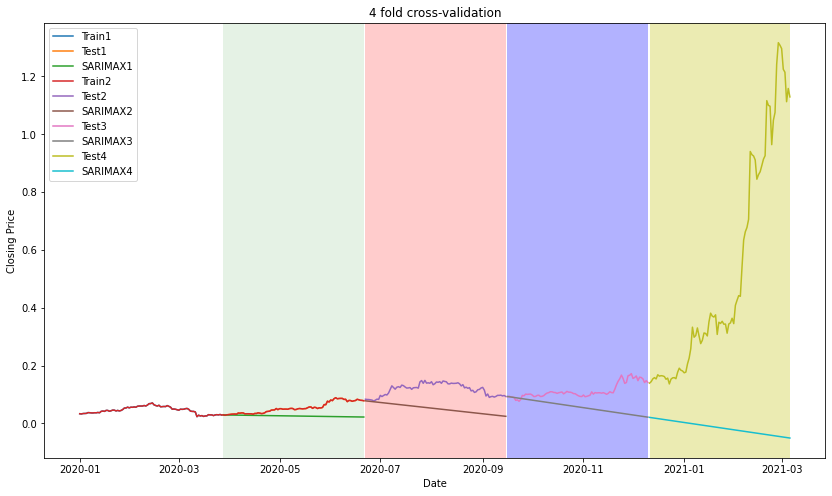

In [62]:
#plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 14,8

#Labels and titles
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("4 fold cross-validation")

#First fold- CV
plt.plot(train1.index, train1, label='Train1')
plt.plot(test1.index, test1, label='Test1')
plt.plot(pred1.index, pred1, label='SARIMAX1')
plt.legend(loc='best')
#Highlighting the region
plt.axvspan(test1.index[0], test1.index[-1],  facecolor='g', alpha=0.1)

#Second fold
plt.plot(train2.index, train2, label='Train2')
plt.plot(test2.index, test2, label='Test2')
plt.plot(pred2.index, pred2, label='SARIMAX2')
plt.legend(loc='best')
#Highlighting the region
plt.axvspan(test2.index[0], test2.index[-1],  facecolor='r', alpha=0.2)

#Third fold
plt.plot(test3.index, test3, label='Test3')
plt.plot(pred3.index, pred3, label='SARIMAX3')
plt.legend(loc='best')
#Highlighting the region
plt.axvspan(test3.index[0], test3.index[-1],  facecolor='b', alpha=0.3)

#Third fold
plt.plot(test4.index, test4, label='Test4')
plt.plot(pred4.index, pred4, label='SARIMAX4')
plt.legend(loc='best')
#Highlighting the region
plt.axvspan(test4.index[0], test4.index[-1],  facecolor='y', alpha=0.3)
